## Estimation, Prediction of Regression Model Residual Analysis

**Ques** 
- Data were collected from a sample of 10 Ice cream vendors located near college campuses.
- For the ith observation or restaurant in the sample, xi is the size of the student population (in thousands) and yi is the quarterly sales (in thousands of dollars).
- The values of xi and yi for the 10 restaurants in the sample are summarized in Table.

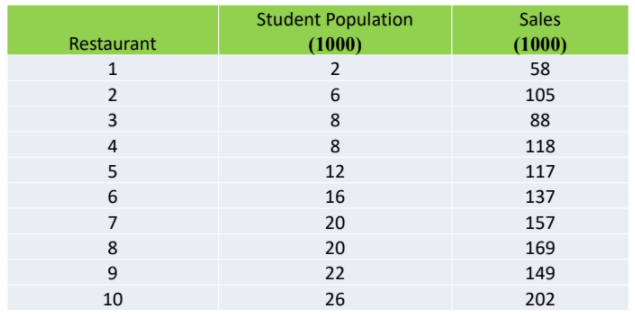

In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression



In [94]:
dat = { 'Restaurant' : [1,2,3,4,5,6,7,8,9,10],
'Student_population' : [2,6,8,8,12,16,20,20,22,26],
'Sales' : [58,105,88,118,117,137,157,169,149,202]
      }
data = pd.DataFrame(dat)

data

,Restaurant,Student_population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


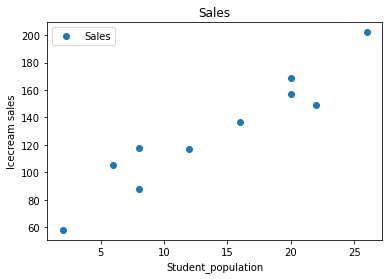

In [95]:
data.plot('Student_population','Sales', style ='o')
plt.ylabel('Icecream sales')
plt.title('Sales')
plt.show()

In [96]:
import statsmodels.api as s

st_pop = data['Student_population']
sales = data['Sales']

st_pop = s.add_constant(st_pop)
model1 = s.OLS(sales,st_pop)
result1 = model1.fit()

print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        16:18:11   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [97]:
from sklearn.linear_model import LinearRegression

x = data['Student_population'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

In [98]:
reg = LinearRegression()
reg.fit(x,y)

reg.intercept_[0],reg.coef_[0][0]

(60.0, 5.0)

C:\Users\amilk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


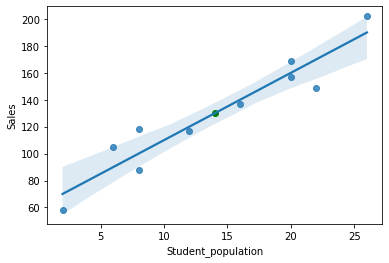

In [99]:
x = data['Student_population']
y = data['Sales']

plt.figure()
sns.regplot(x,y,fit_reg = True)
plt.scatter(np.mean(x),np.mean(y),color = "green")

### Confidence Interval Estimation
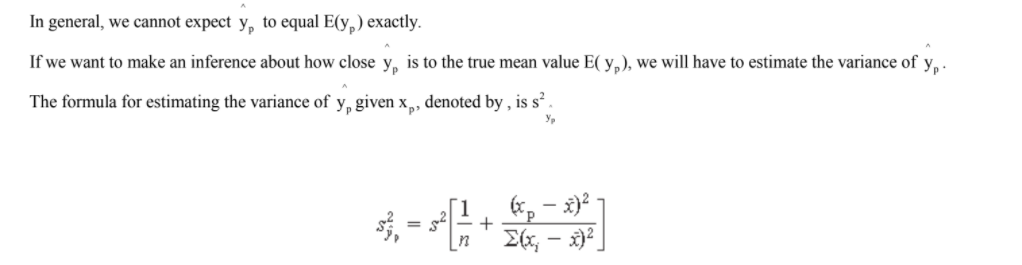

In [100]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(result1, alpha = 0.05)
fittedvalues = data[:,2]
predict_mean_se = data[:3]

predict_mean_ci_low,predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

In [101]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [102]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [103]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [104]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

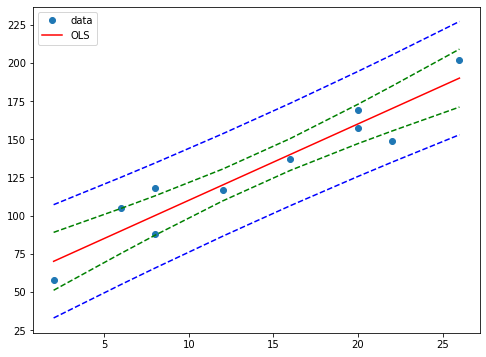

In [105]:
fig, ax = plt.subplots(figsize =(8,6))

ax.plot(x,y,'o',label = 'data')
ax.plot(x,fittedvalues, 'r-',label = 'OLS')

ax.plot(x, predict_ci_low,'b--')
ax.plot(x, predict_ci_upp,'b--')

ax.plot(x, predict_mean_ci_low,'g--')
ax.plot(x, predict_mean_ci_upp,'g--')
ax.legend(loc = 'best');
plt.show()


C:\Users\amilk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Student_population', ylabel='Sales'>

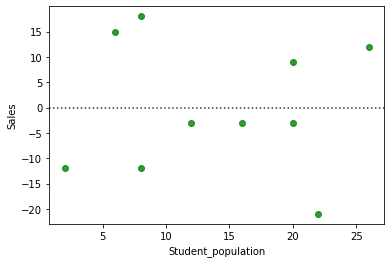

In [106]:
sns.residplot(x, y,color = "g")

In [107]:
dat = { 'Restaurant' : [1,2,3,4,5,6,7,8,9,10],
'Student_population' : [2,6,8,8,12,16,20,20,22,26],
'Sales' : [58,105,88,118,117,137,157,169,149,202]
      }
df = pd.DataFrame(dat)

df

,Restaurant,Student_population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117
5,6,16,137
6,7,20,157
7,8,20,169
8,9,22,149
9,10,26,202


In [108]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Reg1 = ols(formula ="Sales ~ Student_population", data = df)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.55e-05
Time:                        16:18:13   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [109]:
print(anova_lm(Fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [110]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external

In [111]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

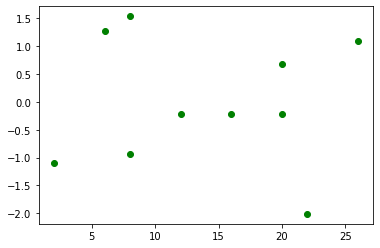

In [112]:
plt.scatter(df['Student_population'], resid_student, color = "green")

<function matplotlib.pyplot.show(close=None, block=None)>

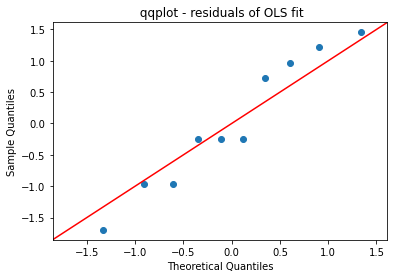

In [113]:
import statsmodels.api as sm

res = Fit1.resid
probplot = s.ProbPlot(res,stats.norm, fit = True)
fig = probplot.qqplot(line ='45')
h = plt.title(' qqplot - residuals of OLS fit')
plt.show

## MULTIPLE REGRESSION

- As an illustration of multiple regression analysis, we will consider a problem faced by the Trucking Company.
- A major portion of business involves deliveries throughout its local area.
- To develop better work schedules, the managers want to estimate the total daily travel time for their drivers.

In [114]:
dat = { 'driving_assignmnet' : [1,2,3,4,5,6,7,8,9,10],
'x1' : [100,50,100,100,50,80,75,65,90,90],
'n_of_deliveries' : [4,3,4,2,2,2,3,4,3,2],
'travel_time':[9.30,4.80,8.90,6.50,4.20,6.20,7.40,6.00,7.60,6.10]
      }
df1 = pd.DataFrame(dat)

df1

,driving_assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5, 1.0, 'Simple linear regression with Miles travelled')

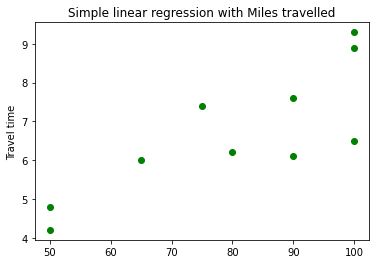

In [115]:
plt.scatter(df1['x1'],df1['travel_time'], color = "green")
plt.ylabel('Travel time')
plt.title('Simple linear regression with Miles travelled')

Text(0.5, 1.0, 'Simple linear regression with number od deliveries')

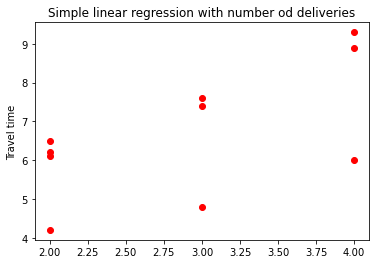

In [116]:
plt.scatter(df1['n_of_deliveries'],df1['travel_time'], color = "red")
plt.ylabel('Travel time')
plt.title('Simple linear regression with number od deliveries')

Text(0.5, 0, 'x1 in green and x2 in red')

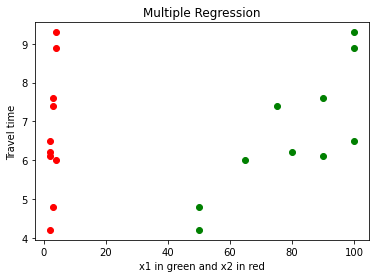

In [117]:
plt.figure()

plt.scatter(df1['x1'],df1['travel_time'], color = "green")

plt.scatter(df1['n_of_deliveries'],df1['travel_time'], color = "red")
plt.ylabel('Travel time')
plt.title('Multiple Regression')
plt.xlabel('x1 in green and x2 in red')

In [118]:
Reg1 = ols(formula = "travel_time ~ x1", data = df1)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Mon, 14 Mar 2022   Prob (F-statistic):            0.00408
Time:                        16:18:15   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [119]:
model = ols('travel_time ~ x1 + n_of_deliveries', data = df1).fit()
model.summary()

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           0.000276
Time:                        16:18:15   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
print(anova_lm(Fit1))

           df     sum_sq    mean_sq          F   PR(>F)
x1        1.0  15.871304  15.871304  15.814578  0.00408
Residual  8.0   8.028696   1.003587        NaN      NaN


In [121]:
anova_table = anova_lm(model, typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


## Regression Approach to ANOVA

In [122]:
dat = { 'A' : [58,64,55,66,67],
'B' : [58,69,71,64,68],
'C' : [48,57,59,47,49]
      }
data = pd.DataFrame(dat)

data

,A,B,C
0,58,58,48
1,64,69,57
2,55,71,59
3,66,64,47
4,67,68,49


In [123]:
data_r = pd.melt(data.reset_index(), id_vars=['index'], value_vars = ['A', 'B', 'C'])
data_r.columns = ['index','treatments','value']

data_r

,index,treatments,value
0,0,A,58
1,1,A,64
2,2,A,55
3,3,A,66
4,4,A,67
5,0,B,58
6,1,B,69
7,2,B,71
8,3,B,64
9,4,B,68


In [124]:
model = ols('value ~ C(treatments)',data = data_r).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


In [125]:
just_dummies = pd.get_dummies(data_r['treatments'])
just_dummies

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [126]:
step_1 = pd.concat([data_r, just_dummies], axis = 1)
step_1.drop(['treatments','C'],inplace = True, axis = 1)
step_1

,index,value,A,B
0,0,58,1,0
1,1,64,1,0
2,2,55,1,0
3,3,66,1,0
4,4,67,1,0
5,0,58,0,1
6,1,69,0,1
7,2,71,0,1
8,3,64,0,1
9,4,68,0,1


In [127]:
model1 = ols('value ~ C(A) + C(B) ',data = step_1).fit()
model1.summary()

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9.176
Date:                Mon, 14 Mar 2022   Prob (F-statistic):            0.00382
Time:                        16:18:16   Log-Likelihood:                -44.691
No. Observations:                  15   AIC:                             95.38
Df Residuals:                      12   BIC:                             97.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.0000      2.380     21.844      0.000      46.813      57.187
C(A)[T.1]     10.0000      3.367      2.970      0.012       2.665      17.335
C(B)[T.1]     14.0000      3.367      4.159      0.001       6.665      21.335
==============================================================================
Omnibus:                        3.780   Durbin-Watson:                   2.550
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.311
Skew:                          -0.196   Prob(JB):                        0.519
Kurtosis:                       1.606   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categorical variable regression

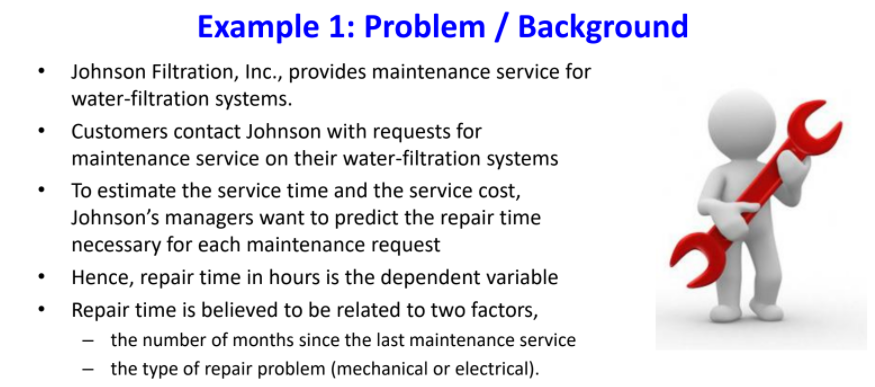

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as s

In [7]:
tbl = pd.read_excel('datasets/4_dummy.xlsx')
tbl.head()

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9


Text(0.5, 1.0, 'Simple linear regression')

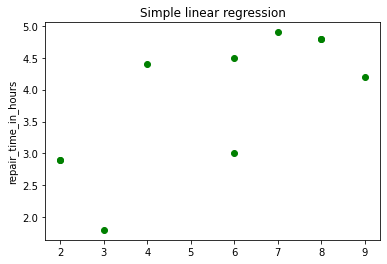

In [8]:
plt.scatter(tbl['months_since_last_service'],tbl['repair_time_in_hours'], color = "green")
plt.ylabel('repair_time_in_hours')
plt.title('Simple linear regression')

In [10]:
from statsmodels.formula.api import ols
Reg = ols(formula = "repair_time_in_hours ~ months_since_last_service", data = tbl)
Fit1 = Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Fri, 18 Mar 2022   Prob (F-statistic):             0.0163
Time:                          16:21:20   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


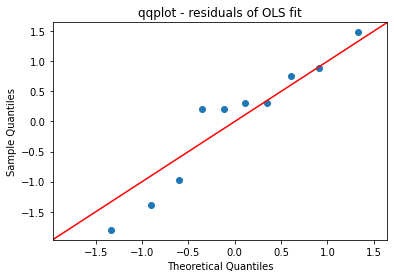

In [13]:
res = Fit1.resid
probplot = s.ProbPlot(res,stats.norm,fit = True)
fig = probplot.qqplot(line ='45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

In [15]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [16]:
step_1 = pd.concat([tbl,just_dummies],axis = 1)
step_1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [17]:
step_1.drop(['type_of_repair','mechanical'],inplace = True, axis = 1)
step_1

In [25]:
result = s.OLS(step_1['repair_time_in_hours'],s.add_constant(step_1[['months_since_last_service','electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Fri, 18 Mar 2022   Prob (F-statistic):            0.00105
Time:                          16:46:57   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


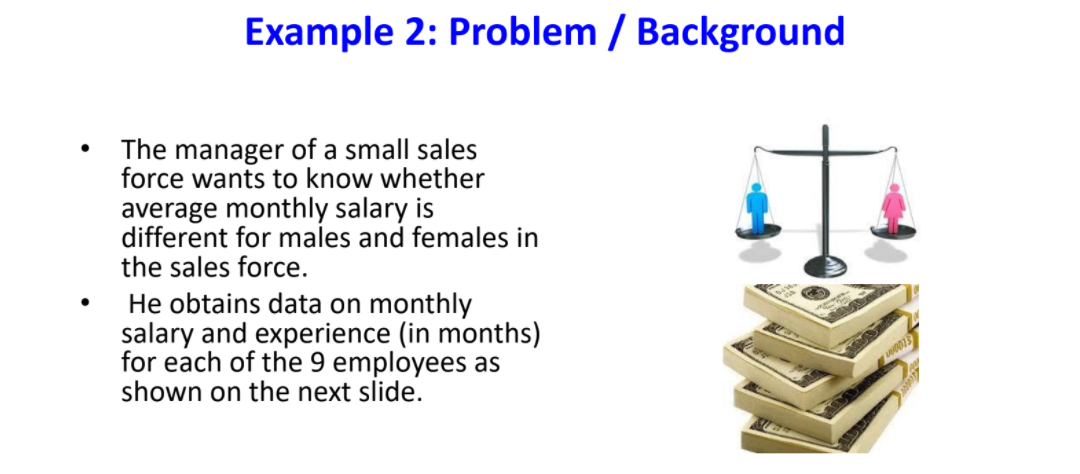

In [26]:
tbl2 = pd.read_excel('datasets/4_dummy2.xlsx')
tbl2.head()

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30


Text(0.5, 1.0, 'Simple linear regression')

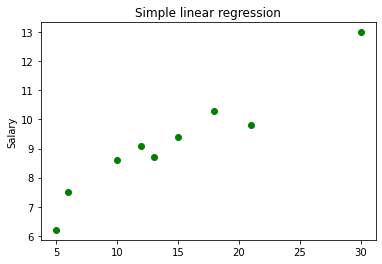

In [27]:
plt.scatter(tbl2['Experience'],tbl2['Salary'], color = "green")
plt.ylabel('Salary')
plt.title('Simple linear regression')

In [29]:
Reg2 = ols(formula = "Salary ~ Experience", data = tbl2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           3.30e-05
Time:                        17:21:06   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


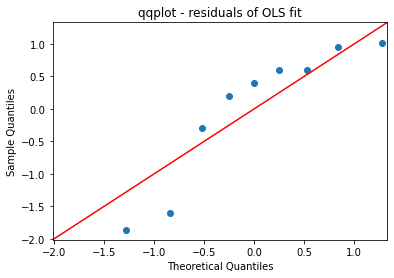

In [30]:
res = Fit2.resid
probplot = s.ProbPlot(res,stats.norm,fit = True)
fig = probplot.qqplot(line ='45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

In [31]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [32]:
step_1 = pd.concat([tbl2,just_dummies2],axis = 1)
step_1

,Employee,Salary,Gender,Experience,Female,Male
0,1,7.5,Male,6,0,1
1,2,8.6,Male,10,0,1
2,3,9.1,Male,12,0,1
3,4,10.3,Male,18,0,1
4,5,13.0,Male,30,0,1
5,6,6.2,Female,5,1,0
6,7,8.7,Female,13,1,0
7,8,9.4,Female,15,1,0
8,9,9.8,Female,21,1,0


In [33]:
step_1.drop(['Gender','Male'],inplace = True, axis = 1)
step_1

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [34]:
result2 = s.OLS(step_1['Salary'],s.add_constant(step_1[['Female']])).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.389
Time:                        17:27:59   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

C:\Users\amilk\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
